<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierTransform_square_RealandImaginaryPartsDualBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Transform: Meaning of Real and Imaginary Parts
</h1></b>

Dr. Bingsen Wang

12/12/2023
</center>

#Python Code
The Python code illustrates the Fourier transform. The Fourier transform is carried out in $t_1$ and $t_2$, which is equivalent to integrating from $-\infty$ to $\infty$ with $f(t)$ being clipped by Heaviside functions, i.e.

$$\begin{align}
\hat f(\omega) &= \int_{-\infty}^{\infty}f(t)[\Phi(t-t1)-\Phi(t-t2)]e^{-j\omega t}dt\\
&=\int_{t_1}^{t_2}f(t)e^{-j\omega t}dt
\end{align}\tag{1}$$
where $\Phi(t)$ is Heaviside function.

<ipython-input-1-ad70cbeea617>:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_func,t1,t2, args=(f,f0,theta))
<ipython-input-1-ad70cbeea617>:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a 

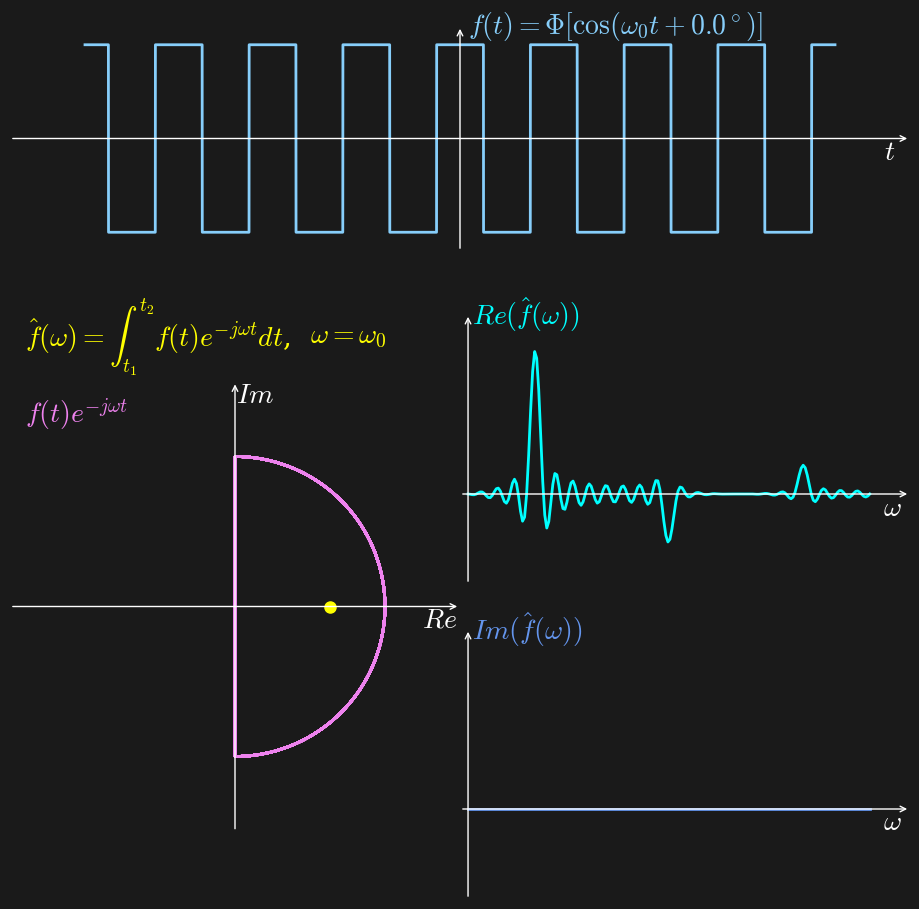

In [1]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,real, imag,heaviside
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(t,f,theta): #cosine function
  return heaviside(cos(2*pi*f*t+theta),0)*2-1

def fourierIntegrand(t,f,f0,theta): #integrand
  return exp(-1j*2*pi*f*t)*y(t,f0,theta)

def fourierIntegral(f,f0,theta,t1,t2): #Fourier transform, the integral
    def real_func(t,f,f0,theta):
        return real(fourierIntegrand(t,f,f0,theta))
    def imag_func(t,f,f0,theta):
        return imag(fourierIntegrand(t,f,f0,theta))
    real_integral = quad(real_func,t1,t2, args=(f,f0,theta))
    imag_integral = quad(imag_func,t1,t2, args=(f,f0,theta))
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','navy','k',(.1,.1,.1),'w'] #colors light bg
Nf = 50
t1=-0.5
t2=0.5
t=linspace(t1,t2,2048*8)
theta = linspace(0,pi/2,Nf)
f0=8
fst = 0 #starting frequency
fnd = 6 #end frequency
fr = linspace(fst,fnd,200)#frequency ratio

fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 0.72, 1, .25], [-.6,.6], [-1.2,1.2]], #signal
            [[.0, .075,   .5, .5], [-1.5,1.5], [-1.5,1.5]], #Fourier transform
            [[.5, .35,   .5, .3], [-.02,1.1], [-.4,.8]], #real f(omega)
            [[.5, 0,   .5, .3], [-.02,1.1], [-.4,.8]], #imag f(omega)
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['', '$t$'],
        ['$Im$', '$Re$'],
        [r'$Re(\hat f(\omega))$', '$\omega$'],
        [r'$Im(\hat f(\omega))$', '$\omega$'],
        ] #variables for yx axes of each subplot

ax_lst=[] #axis list or the list of subplots
ytxt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right',color=clst[-2]) #x-axis label
  if k==1:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],size=20,va='top',color=clst[-2])) #y label
  else:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],color=clst[k],size=20,va='center')) #y label
line_lst.append(ax_lst[1].plot([], [],color=clst[4],ls='',marker='o',markersize='8')[0])
# line_lst[1].set_alpha(0.3)
ax_lst[1].text(-1.4,ax_frame[1][2][1]+.3,r'$\hat f(\omega) =\int_{t_1}^{t_2}f(t)e^{-j\omega t}dt$,',color=clst[4],va='center',size=20)
ax_lst[1].text(-1.4,ax_frame[1][2][1]-0.1,'$f(t)e^{-j\omega t}$',color=clst[1],va='top',size=20)
title1= ax_lst[1].text(.5,ax_frame[1][2][1]+.3,'',va='center',size=20,color=clst[4])

# animation function. This is called sequentially
def animate(i):
  yt=y(t,f0,theta[i])
  yft=[]
  for x in fr: #Fourier integral
    yft.append(fourierIntegral(x*f0,f0,theta[i],t1,t2)[0])
  yft0 = fourierIntegral(f0,f0,theta[i],t1,t2)[0] #Fourier transform integrand at w0
  fti = fourierIntegrand(t,f0,f0,theta[i]) #Fourier transform integrand at w0
  title1.set_text('$\omega =\omega_0$')
  ytxt_lst[0].set_text(r'$f(t)=\Phi[\cos(\omega_0 t+'+str(round(theta[i]/pi*180,2))+'^\circ)]$')
  line_lst[0].set_data(t,yt)
  line_lst[1].set_data(real(fti),imag(fti))
  line_lst[2].set_data(fr/(fnd-fst),real(yft))
  line_lst[3].set_data(fr/(fnd-fst),imag(yft))
  line_lst[4].set_data([real(yft0)],[imag(yft0)])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=500)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierTransform_square_realImaginaryDualBG.mp4"
writervideo = animation.FFMpegWriter(fps=4)
anim.save(fn, writer=writervideo,dpi = 120)